In [1]:
# import libraries to be used

import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from wordcloud import WordCloud, ImageColorGenerator
import warnings
import missingno as mn

# supress warnings

warnings.filterwarnings('ignore')

In [2]:
# load dataset into a data frame

df_vgame = pd.read_csv('vgsales.csv')

# display the first 5 records on the dataframe

df_vgame.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# get dataframe dimensions

print("Database dimension     :",df_vgame.shape)
print("Database size          :",df_vgame.size)

# get info about the dataframe (columns,entries,datatype etc...)

df_vgame.info()

# describe the dataframe and get statistics

df_vgame.describe()

Database dimension     : (16598, 11)
Database size          : 182578
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


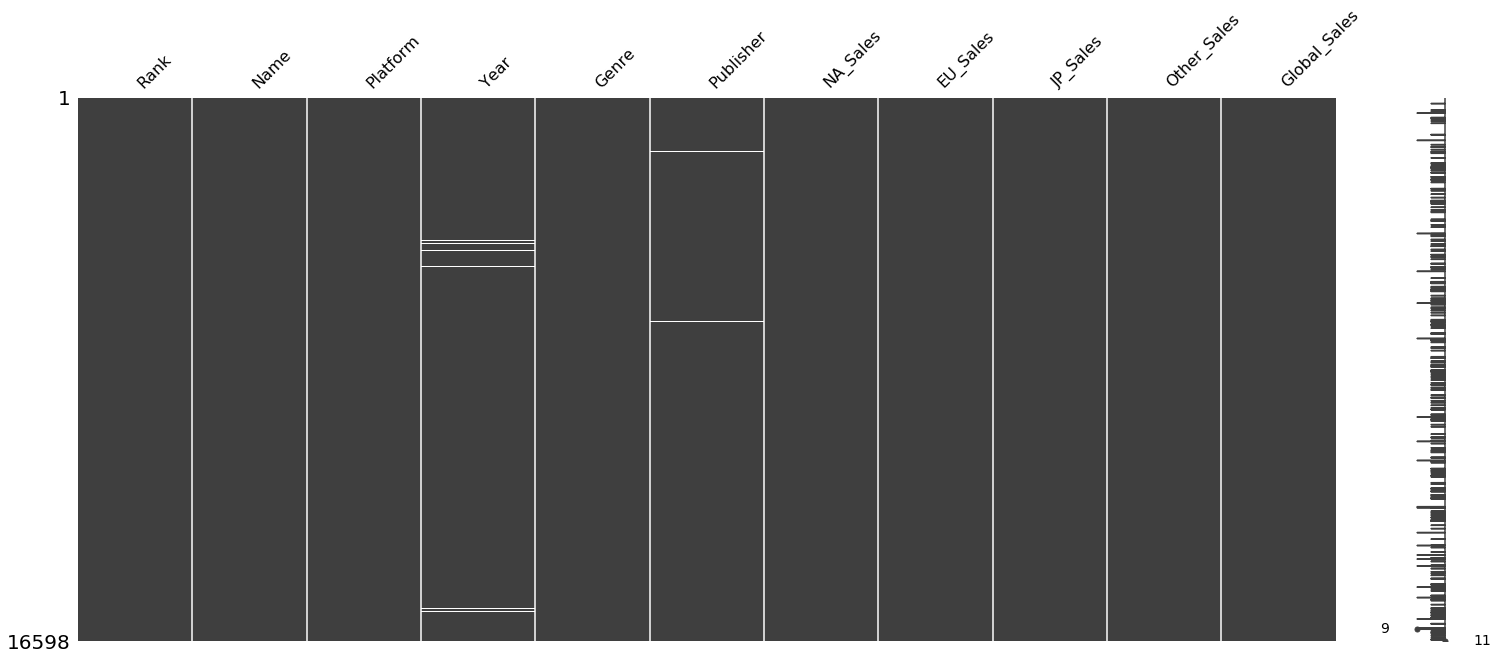

In [4]:
# Lets take a look at the dataframe to check null values

mn.matrix(df_vgame)

In [5]:
# Data Cleaning
# count number null values in each column

null_value_perc = pd.DataFrame((df_vgame.isnull().sum())*100/df_vgame.shape[0]).reset_index()
null_value_perc.columns = ['Column Name', 'Null Values Percentage']
null_value = pd.DataFrame(df_vgame.isnull().sum()).reset_index()
null_value.columns = ['Column Name', 'No. of Null Values']
null_vgd = pd.merge(null_value, null_value_perc, on='Column Name')
null_vgd

,Column Name,No. of Null Values,Null Values Percentage
0,Rank,0,0.000000
1,Name,0,0.000000
2,Platform,0,0.000000
3,Year,271,1.632727
4,Genre,0,0.000000
5,Publisher,58,0.349440
6,NA_Sales,0,0.000000
7,EU_Sales,0,0.000000
8,JP_Sales,0,0.000000
9,Other_Sales,0,0.000000


In [6]:
# get the number of unique game names with missing year 

game_missedyear = df_vgame[df_vgame['Year'].isnull()]["Name"].unique()
print("num of unique game year missing : ",len(game_missedyear))

# impute missing year

df_vgame['Year'] = df_vgame['Year'].fillna(2009.0)

# check if correct imputation occured

df_vgame['Year'].isnull().sum()

num of unique game year missing :  233


0

In [7]:
# change year to integer

df_vgame['Year']=df_vgame['Year'].astype('int')
df_vgame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [8]:
# get number of games with missing publisher

print("Total Publisher missing values ", df_vgame['Publisher'].isnull().sum(),' rows')

# drop thesse values as they only sold once and sell value is insignificant

df_vgame = df_vgame.dropna()

# check if records were dropped

df_vgame.isnull().sum()

Total Publisher missing values  58  rows


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [9]:
# Visualization

# lets get the dataframe statistics indepth

games =df_vgame['Name'].unique()
publishers = df_vgame['Publisher'].unique()
platforms = df_vgame['Platform'].unique()
game_type = df_vgame['Genre'].unique()

print("Number of Games: ",len(games))
print("Publishers: ",len(publishers))
print("Platforms: ",len(platforms))
print("Game Types: ",len(game_type))



Number of Games:  11442
Publishers:  578
Platforms:  31
Game Types:  12


In [11]:
# Video Game Sales by Year

year_sale =  df_vgame.groupby('Year')['Global_Sales'].sum().reset_index()

# Total Game Sales by year

fig = go.Figure(go.Bar(x=year_sale['Year'],y=year_sale['Global_Sales'],marker={'color': year_sale['Global_Sales'],'colorscale': 'Viridis'}))
fig.update_layout(title_text='Video Game Global Sales by Release Year',xaxis_title="Year",yaxis_title="Sum of Sales")
fig.show()

In [12]:
# Top 10 video game publishers

publisher =  df_vgame.groupby('Publisher')['Name'].count().reset_index()
publisher = publisher.sort_values('Name',ascending=False).reset_index()
publisher.drop("index",axis = 1,inplace=True)

fig = go.Figure(go.Bar(x=publisher['Publisher'],y=publisher['Name'][:10],marker={'color': publisher['Name'][:10],'colorscale': 'Viridis'}))
fig.update_layout(title_text='Video Game Top 10 Publishers',xaxis_title="Publisher Name",yaxis_title="number of games published")
fig.show()



In [21]:
# Top 10 Video Game Sales Globally by Publisher

publisher =  df_vgame.groupby('Publisher')['Global_Sales'].sum().reset_index()
publisher = publisher.sort_values('Global_Sales',ascending=False).reset_index()
publisher.drop("index",axis = 1,inplace=True)

fig = go.Figure(go.Bar(x=publisher['Publisher'],y=publisher['Global_Sales'][:10],marker={'color': publisher['Global_Sales'][:10],'colorscale': 'Viridis'}))
fig.update_layout(title_text='Video Game Top 10 Publishers by Global sales',xaxis_title="Publisher Name",yaxis_title="Number of Global sales")
fig.show()


In [14]:
# Top 5 Publishers per Region

EU = df_vgame.pivot_table('EU_Sales', columns='Publisher', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:5]
EU_publishers = EU.index

JP = df_vgame.pivot_table('JP_Sales', columns='Publisher', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:5]
JP_publishers = JP.index

NA = df_vgame.pivot_table('NA_Sales', columns='Publisher', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:5]
NA_publishers = NA.index

Other = df_vgame.pivot_table('Other_Sales', columns='Publisher', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:5]
Other_publishers = Other.index

Global = df_vgame.pivot_table('Global_Sales', columns='Publisher', aggfunc='sum').T
Global = Global.sort_values(by='Global_Sales', ascending=False).iloc[0:5]
Global_publishers = Global.index

fig = go.Figure()
fig.update_layout(xaxis_title="Publisher Name",yaxis_title="Number of sales")

# Add Traces

fig.add_trace(
    go.Bar(y=EU['EU_Sales'],
           x=EU_publishers,
           name="Europe",
           marker={'color': EU['EU_Sales'],'colorscale': 'Portland'},
           visible=False))

fig.add_trace(
    go.Bar(y=NA['NA_Sales'],
           x=NA_publishers,
           name="North America",
          marker={'color': NA['NA_Sales'],'colorscale': 'Portland'}))
fig.add_trace(
    go.Bar(y=JP['JP_Sales'],
           x=JP_publishers,
           name="Japan",
           marker={'color': JP['JP_Sales'],'colorscale': 'Portland'},
           visible=False))

fig.add_trace(
    go.Bar(y=Other['Other_Sales'],
           x=Other_publishers,
           name="Others",
           marker={'color': Other['Other_Sales'],'colorscale': 'Portland'},
           visible=False))

fig.add_trace(
    go.Bar(y=Global['Global_Sales'],
           x=Global_publishers,
           name="Global",
           marker={'color': Global['Global_Sales'],'colorscale': 'Portland'},
               visible=False ))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="North America",
                     method="update",
                     args=[{"visible": [True, False,False, False, False]},
                           {"title": "Top 5 Publishers for North America"}]),
                dict(label="Europe",
                     method="update",
                     args=[{"visible": [False,True, False, False, False]},
                           {"title": "Top 5 Publishers for Europe"}]),
                dict(label="Japan",
                     method="update",
                     args=[{"visible": [False,False, True, False, False]},
                           {"title": "Top 5 Publishers for Japan"}]),
                dict(label="Others",
                     method="update",
                     args=[{"visible": [False,False, False, True, False]},
                           {"title": "Top 5 Publishers for Other Region"}]),
                dict(label="Global",
                     method="update",
                     args=[{"visible": [False,False, False, False, True]},
                           {"title": "Top 5 Publishers for Global"}]),
            ]),
        )
    ])

# Set title
fig.update_layout(
    title_text="Top 5 Publishers per region",
    xaxis_domain=[0.05, 1.0]
)

fig.show()



In [15]:
# Top 10 video game by  Platform

publisher =  df_vgame.groupby('Platform')['Name'].count().reset_index()
publisher = publisher.sort_values('Name',ascending=False).reset_index()
publisher.drop("index",axis = 1,inplace=True)

fig = go.Figure(go.Bar(x=publisher['Platform'],y=publisher['Name'],marker={'color': publisher['Name'],'colorscale': 'Bluered'}))
fig.update_layout(title_text='Video Games vs Platform',xaxis_title="Platform Name",yaxis_title="number of games published")
fig.show()



In [16]:
# Genre vs Game Sales

genre = df_vgame.loc[:,['Genre','Global_Sales']]
genre['total_sales'] = genre.groupby('Genre')['Global_Sales'].transform('sum')
genre.drop('Global_Sales', axis=1, inplace=True)
genre = genre.drop_duplicates()

fig = px.pie(genre, names='Genre', values='total_sales', template='seaborn')
fig.update_traces(rotation=90, textinfo="percent+label")
fig.update_layout(title="Genre Game Sales",title_x=0.5)
fig.show()

In [17]:
# display Video Game Count by Genre

game_genre =  df_vgame.groupby('Genre')['Name'].count().reset_index().sort_values("Name",ascending=False)
game_genre = game_genre.reset_index()
game_genre.drop("index",axis = 1,inplace=True)

fig = go.Figure([go.Pie(labels=game_genre['Genre'], values=game_genre['Name'],hole=0.2)])  
fig.update_traces(hoverinfo='label+percent+value', textinfo='percent', textfont_size=15)
fig.update_layout(title="Genre vs Number of games Published",title_x=0.1)
fig.show()

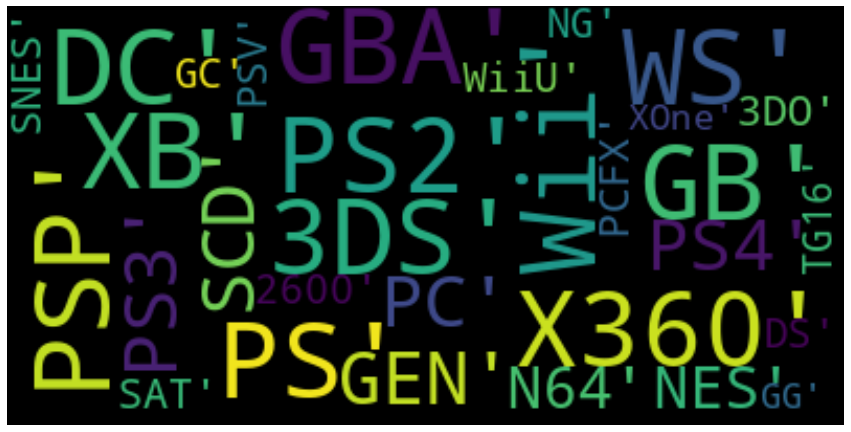

In [18]:
# Word cloud for Platform 

text = list(set(df_vgame['Platform']))
plt.rcParams['figure.figsize'] = (15,15)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

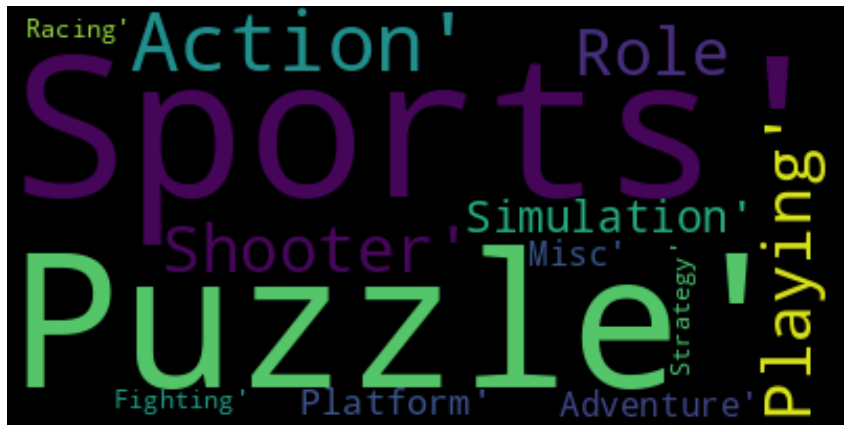

In [19]:
# word count for Genre

text = list(set(df_vgame['Genre']))
plt.rcParams['figure.figsize'] = (15,15)
wordcloud = WordCloud(max_font_size=100, max_words=1000,background_color="black").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [22]:
# Year wise total sale

perc = df_vgame[["Year",'NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
perc[['NA_mean','EU_mean','JP_mean','Other_mean']] = perc.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].transform('sum')
perc.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc.sort_values("Year")
df_vgame1 = pd.DataFrame({'Place': ['NA_Sales']*perc.shape[0], 'Year':perc['Year'], 'Sales': perc['NA_mean']})
df_vgame2 = pd.DataFrame({'Place': ['EU_Sales']*perc.shape[0], 'Year':perc['Year'], 'Sales': perc['EU_mean']})
df_vgame3 = pd.DataFrame({'Place': ['JP_Sales']*perc.shape[0], 'Year':perc['Year'], 'Sales': perc['JP_mean']})
df_vgame4 = pd.DataFrame({'Place': ['Other_Sales']*perc.shape[0], 'Year':perc['Year'], 'Sales': perc['Other_mean']})
final = pd.concat([df_vgame1,df_vgame2,df_vgame3,df_vgame4], axis=0)
final = final.sort_values("Year")
fig=px.bar(final,x='Place', y="Sales", animation_frame="Year",animation_group="Place", color="Place", hover_name="Place",range_y=[0,200])
fig.update_layout(title="Year Wise Total Sale",title_x=0.5)
fig.show()